# MNIST Classifier - Hello World of Deep Learning (DL)! - CNN on CPU
<hr/>

## Introduction

In this version, we try to build a small CNN and run it on a CPU. The CNN architecture is simplified here. 

>__Note:__ See GPU notebook for details.

## Imports

In [1]:
import os
import time
import idx2numpy
import numpy as np ; np.random.seed(42)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf ; tf.random.set_seed(42)

from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from mpl_toolkits.axes_grid1 import ImageGrid

2025-03-12 06:28:43.333216: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 06:28:43.336173: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 06:28:43.345311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741760923.360974   53083 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741760923.365557   53083 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 06:28:43.380637: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Hardware

In [2]:
CPUS = tf.config.list_physical_devices('CPU')
GPUS = tf.config.list_physical_devices('GPU')

print("[INFO] Num CPUs:", len(CPUS), ", list = ", CPUS)
print("[INFO] Num GPUs:", len(GPUS), ", list = ", GPUS)

[INFO] Num CPUs: 1 , list =  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[INFO] Num GPUs: 0 , list =  []


2025-03-12 06:28:46.326326: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Notebook parameters

In [3]:
# NumPy

np.set_printoptions(linewidth=200) # to enlarge the print() line
np.random.seed(42) # the random seed init
np.set_printoptions(precision=3) # for numpy floats: number of decimals

# TF: disable TF debug logging messages 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Globals & hyperparameters

In [4]:
# =============
# DATA_TOPDIR
# =============

# Contain the (un)compressed idx files of MNIST

# on assieoussou (Laptop - CPU)
DATA_TOPDIR = "/home/ml/datasets/mnist"

# =======
# MNIST 
# =======

# dataset files
TRAIN_IMAGES_DATASET_FILE = os.path.join(DATA_TOPDIR, "train-images-idx3-ubyte")
TRAIN_LABELS_DATASET_FILE = os.path.join(DATA_TOPDIR, "train-labels-idx1-ubyte")
TEST_IMAGES_DATASET_FILE = os.path.join(DATA_TOPDIR, "t10k-images-idx3-ubyte")
TEST_LABELS_DATASET_FILE = os.path.join(DATA_TOPDIR, "t10k-labels-idx1-ubyte")

# The MNIST images format
num_pixels = 28 * 28

# the total number of digits
num_classes = 10

# ==========================
# Training hyperparameters
# ==========================

epochs = 10 # <= CPU/GPU

batch_size = 8 # <= on CPU

# =======
# Demo 
# =======

# Demo dir: where demonstration images are placed
DEMO_DIR = os.path.join(DATA_TOPDIR, "demo")
os.makedirs(DEMO_DIR, exist_ok=True)

# for demo images 
nb_demo = 10
demo_prefix = "demo_img_"


## Data Preparation (Part I)

In [5]:
# 1. Read each dataset into a conventional numpy 2D array
train_x_ndarray = idx2numpy.convert_from_file(TRAIN_IMAGES_DATASET_FILE)
train_y_ndarray = idx2numpy.convert_from_file(TRAIN_LABELS_DATASET_FILE)

test_x_ndarray = idx2numpy.convert_from_file(TEST_IMAGES_DATASET_FILE)
test_y_ndarray = idx2numpy.convert_from_file(TEST_LABELS_DATASET_FILE)

(60000, 28, 28) (60000,)
train_x_ndarray[0] = 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18

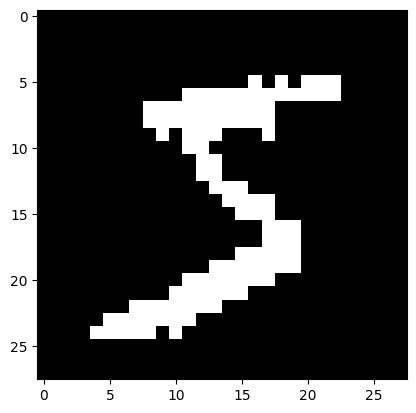

In [6]:
# quick check 
print(train_x_ndarray.shape, train_y_ndarray.shape) # => (60000, 28, 28) (60000,)
print(f"train_x_ndarray[0] = \n{train_x_ndarray[0]}, \ntrain_y_ndarray[0] = {train_y_ndarray[0]}" )
print(train_x_ndarray[0].shape, train_y_ndarray[0].shape) # => (28, 28) ()

# load and display as b&w
# plt.imshow(train_x_ndarray[0], cmap='gray')  # RGB
plt.imshow(Image.fromarray(train_x_ndarray[0]).convert('1'), cmap='gray')

## Model construction & configuration

__Building a specific CPU model__

In [16]:
def build_model():
    model = Sequential()
    # =================================
    # Feature extractor
    # =================================
    model.add(Input(shape=(28,28,1))),
    model.add(Conv2D(16, kernel_size=(3,3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2))),
    # =================================
    # Neck
    # =================================
    model.add(Flatten()),
    model.add(Dropout(0.5))
    # =================================
    # Head 
    # =================================
    model.add(Dense(units=num_classes, activation="softmax"))
    # =================================
    # Compile model
    # =================================
    model.compile(loss="categorical_crossentropy", 
                  # optimizer="adam",
                  optimizer=tf.keras.optimizers.Adam(1e-3),
                  metrics=["accuracy"])
    return model

# Construct the model and show it
model = build_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        27,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

## Data Preparation (Part II)

>__Note:__
>
> Now we know our taget ML model; thus we need to finalize the preparation of our data according this model (see the Input shape of (28, 28, 1). We don't have to do a lot of work since the original images format is quite similar.

In [8]:
X_train = train_x_ndarray.astype('float32')
X_test = test_x_ndarray.astype('float32')

# make sure you are not introducing nan
X_train = np.nan_to_num(X_train, nan=0)
X_test = np.nan_to_num(X_test, nan=0)

# normalization: VERY IMPORTANT!!!!
X_train = X_train / 255
X_test = X_test / 255

# one hot encoding of labels
y_train = to_categorical(train_y_ndarray)
y_test = to_categorical(test_y_ndarray)
assert y_train.shape[1] == num_classes, f"[FATAL] The number of classes should be equal to {num_classes}. Abort!"

# before reshaping
print("[INFO] before reshaping >>> ", X_train.shape, X_train[0].shape, y_train.shape, X_test.shape, y_train.shape)
print("[INFO] before reshaping >>> ",X_train[0], y_train[0])

[INFO] before reshaping >>>  (60000, 28, 28) (28, 28) (60000, 10) (10000, 28, 28) (60000, 10)
[INFO] before reshaping >>>  [[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.

In [9]:
# Explicit reshaping of training and testing data to (28, 28, 1)

# WARNING: 
# Here, we could have rely on implicit broadcasting of TF Keras to not reshape and let ate of shape (28, 28) to be automatically 
# reshaped into (28, 28, 1) ; bit it is a bad practice!

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("[INFO] After reshaping >>> ", X_train.shape, X_train[0].shape, y_train.shape, X_test.shape, y_train.shape)

[INFO] After reshaping >>>  (60000, 28, 28, 1) (28, 28, 1) (60000, 10) (10000, 28, 28, 1) (60000, 10)


## Model Training & Evaluation

__Construct the demonstration set__

Here, we isolate in the `demo/` subdirectory, some testing images. We'll use them later on - once our model is trained - to demonstrate how accurate it is. 

In [10]:
def reconstruct_demo_dir(nb, from_set, target_dir):
    # randomly collect the indices
    demo_rnd_indices = np.random.randint(1, high=len(from_set), size=nb)
    for i in demo_rnd_indices:
        plt.imsave(os.path.join(target_dir, demo_prefix + str(i) + ".jpg"), from_set[i], cmap='gray')
    print(f"[INFO] {len(demo_rnd_indices)} images have been created in {target_dir}")        

# check if the demo dir exists and contains at least nb_demo files

if os.path.exists(DEMO_DIR): 
    nb_files = len([name for name in os.listdir(DEMO_DIR) if os.path.isfile(os.path.join(DEMO_DIR, name))])
    if nb_files < nb_demo:
        # So you can safely manually add demo file 
        reconstruct_demo_dir(nb=nb_demo, from_set=test_x_ndarray, target_dir=DEMO_DIR)
    else:
        print(f"[INFO] Nothing to do because {DEMO_DIR} contains already enough images!")
else: 
    reconstruct_demo_dir(nb=nb_demo, from_set=test_x_ndarray, target_dir=DEMO_DIR)

[INFO] Nothing to do because /home/ml/datasets/mnist/demo contains already enough images!


__Test some demo images before training__

[INFO] Load demo images as Black'n White... 


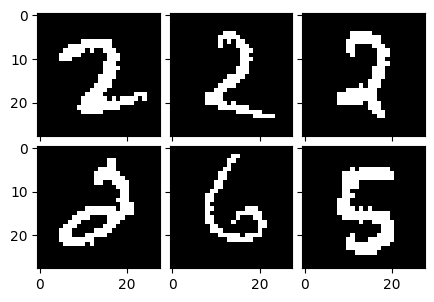

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[INFO] Prédictions:
 digit: 5 	 -  digit: 5 	 -  digit: 5 	 - 
 digit: 5 	 -  digit: 5 	 -  digit: 5 	 - 



In [11]:
nb_imgs = 6
nb_rows = 2
nb_cols = 3

# load as b&w images
print("[INFO] Load demo images as Black'n White... ")
demo_imgs = [Image.open(os.path.join(DEMO_DIR, name)).convert('1') for name in os.listdir(DEMO_DIR)[:nb_imgs]]

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(
    fig, 111,  # similar to subplot(111)
    nrows_ncols=(nb_rows, nb_cols),
    axes_pad=0.1,
)

for ax, img in zip(grid, demo_imgs):
    ax.imshow(img)
plt.show()

# Now let's predict

demo_imgs_arrays = np.array([
    np.asarray(demo_img).reshape(demo_img.size[0], demo_img.size[1], 1) 
    for demo_img in demo_imgs
]) 
raw_predictions = model.predict(demo_imgs_arrays)

refined_predictions = []
for rp in raw_predictions:
    refined_predictions.append(np.argmax(rp))

print("[INFO] Prédictions:")

msg_pred = ""
cpt = 0
for i in range(nb_rows):
    for j in range(nb_cols):
        msg_pred += f" digit: {refined_predictions[cpt]} \t - "
        cpt += 1
    msg_pred += "\n"
    
print(msg_pred)

__Train__

In [12]:
# Remind the hyperparameters values

t1 = time.time()

print("[INFO]")
print("[INFO] ======================= ")
print("[INFO] Hyperparameters")
print("[INFO] ======================= ")
print("[INFO]")
print(f"[INFO] batch_size = {batch_size}")
print(f"[INFO] epochs = {epochs}")

print("[INFO]")
print("[INFO] ======================= ")
print("[INFO] Train & Evaluate")
print("[INFO] ======================= ")
print("[INFO]")

# Fit the model
history = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=batch_size,
    validation_data=(X_test, y_test), 
    epochs=epochs
)

t2 = time.time()
print(f"[INFO] Duration = {t2-t1} seconds.")

# Note: 
# During the fit, monitor the GPUs activity using: $ watch -n 0.5 nvidia-smi

[INFO]
[INFO] ======================= 
[INFO] Hyperparameters
[INFO] ======================= 
[INFO]
[INFO] batch_size = 8
[INFO] epochs = 10
[INFO]
[INFO] ======================= 
[INFO] Train & Evaluate
[INFO] ======================= 
[INFO]
Epoch 1/10


2025-03-12 06:28:47.719204: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8778 - loss: 0.4112 - val_accuracy: 0.9696 - val_loss: 0.0923
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9590 - loss: 0.1316 - val_accuracy: 0.9771 - val_loss: 0.0716
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9679 - loss: 0.1049 - val_accuracy: 0.9797 - val_loss: 0.0635
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9718 - loss: 0.0926 - val_accuracy: 0.9814 - val_loss: 0.0578
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9733 - loss: 0.0857 - val_accuracy: 0.9830 - val_loss: 0.0542
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9756 - loss: 0.0786 - val_accuracy: 0.9830 - val_loss: 0.0511
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9773 - loss: 0.0734 - val_accuracy: 0.9828 - val_loss: 0.0500
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9783 - loss: 0.0715 - val

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


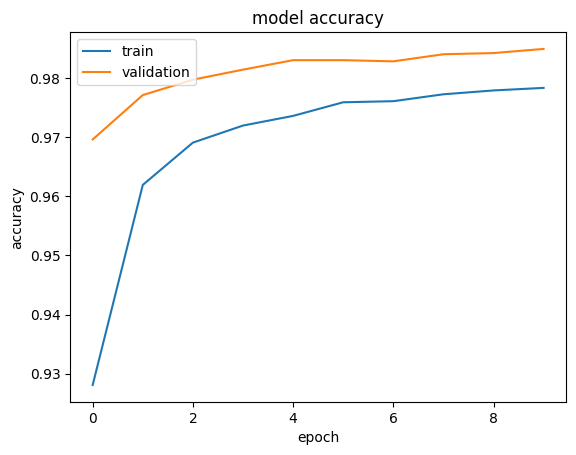

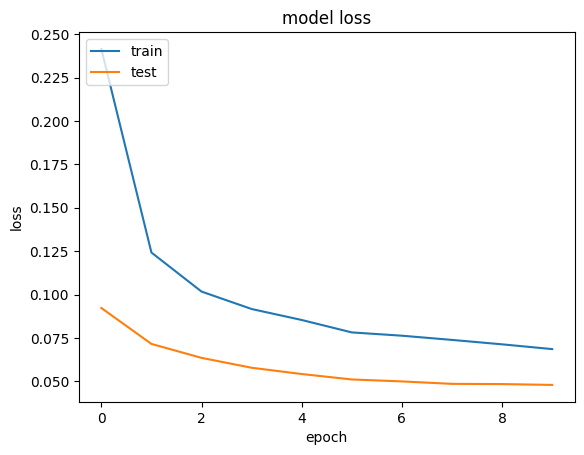

In [13]:
# check entries in the history 
print(history.history.keys()) # => dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# summarize history for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
# Final evaluation of the model
scores = model.evaluate(
    x=X_test, 
    y=y_test, 
    verbose=0
)

print("\n[INFO] Model Val Accuracy: %.2f%%, Error: %.2f%%" % (scores[1]*100, 100-scores[1]*100))


[INFO] Model Val Accuracy: 98.49%, Error: 1.51%


__Test some demo images afetr training__

[INFO] Previous demo images... 


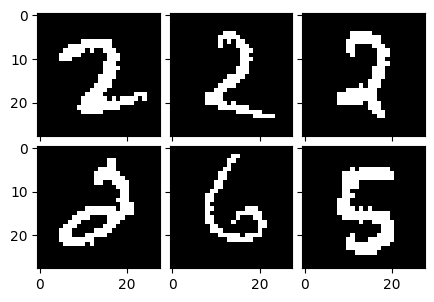

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[INFO] Prédictions:
 digit: 2 	 -  digit: 2 	 -  digit: 2 	 - 
 digit: 2 	 -  digit: 6 	 -  digit: 5 	 - 



In [15]:
# lest reulse the same previous demo settings...

print("[INFO] Previous demo images... ")
fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(
    fig, 111,  # similar to subplot(111)
    nrows_ncols=(nb_rows, nb_cols),
    axes_pad=0.1,
)

for ax, img in zip(grid, demo_imgs):
    ax.imshow(img)
plt.show()

# Now let's predict (again)
raw_predictions = model.predict(demo_imgs_arrays)

refined_predictions = []
for rp in raw_predictions:
    refined_predictions.append(np.argmax(rp))

print("[INFO] Prédictions:")

msg_pred = ""
cpt = 0
for i in range(nb_rows):
    for j in range(nb_cols):
        msg_pred += f" digit: {refined_predictions[cpt]} \t - "
        cpt += 1
    msg_pred += "\n"
    
print(msg_pred)

__END OF NOTEBOOK.__